In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('../resources/datasets/census_income_dataset.csv')
df = data.copy()
df

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
data.describe()

,Unnamed: 0,AGE,FNLWGT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,8140.000000,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,4700.064202,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,4070.000000,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,8140.000000,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,12210.000000,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,16280.000000,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [4]:
# Assuming df is your DataFrame with a column 'AGE'

# Filter the DataFrame for ages between 30 and 40
age_between_30_40 = df[(df['AGE'] >= 30) & (df['AGE'] <= 40)]

# Count the number of people within the age range
count_between_30_40 = age_between_30_40.shape[0]

print(f"The number of people between 30 and 40 years old is: {count_between_30_40}")


The number of people between 30 and 40 years old is: 4709


In [5]:
df['AGE']

0        25
1        38
2        28
3        44
4        18
         ..
16276    39
16277    64
16278    38
16279    44
16280    35
Name: AGE, Length: 16281, dtype: int64

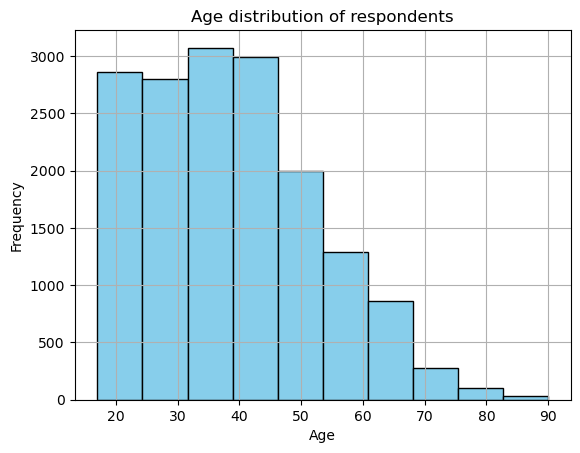

In [7]:
plt.hist(df['AGE'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of respondents')
plt.grid(True)
plt.savefig('../resources/img/age_dist.svg', format='svg')
plt.show()

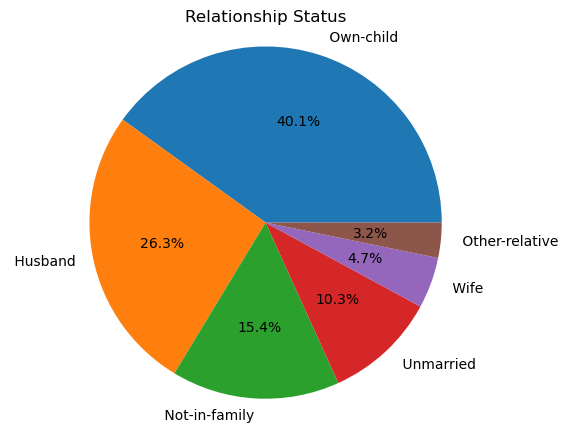

In [9]:
labels = [' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife', ' Other-relative']
# plt.pie(df['RELATIONSHIP'].value_counts(), labels=labels)
sizes = df['RELATIONSHIP'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Relationship Status')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('../resources/img/relationship_stat.svg', format='svg')
plt.axis('equal')
plt.show()

In [ ]:
df['SALARY'][2]

In [11]:
df['SALARY_LABEL'] = df['SALARY'].map({' <=50K': 0, ' >50K': 1})

print(df)

       Unnamed: 0  AGE      WORKCLASS  FNLWGT      EDUCATION  EDUCATION-NUM  \
0               0   25        Private  226802           11th              7   
1               1   38        Private   89814        HS-grad              9   
2               2   28      Local-gov  336951     Assoc-acdm             12   
3               3   44        Private  160323   Some-college             10   
4               4   18              ?  103497   Some-college             10   
...           ...  ...            ...     ...            ...            ...   
16276       16276   39        Private  215419      Bachelors             13   
16277       16277   64              ?  321403        HS-grad              9   
16278       16278   38        Private  374983      Bachelors             13   
16279       16279   44        Private   83891      Bachelors             13   
16280       16280   35   Self-emp-inc  182148      Bachelors             13   

            MARITAL STATUS          OCCUPATION     

In [12]:
df

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY,SALARY_LABEL
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,0
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0


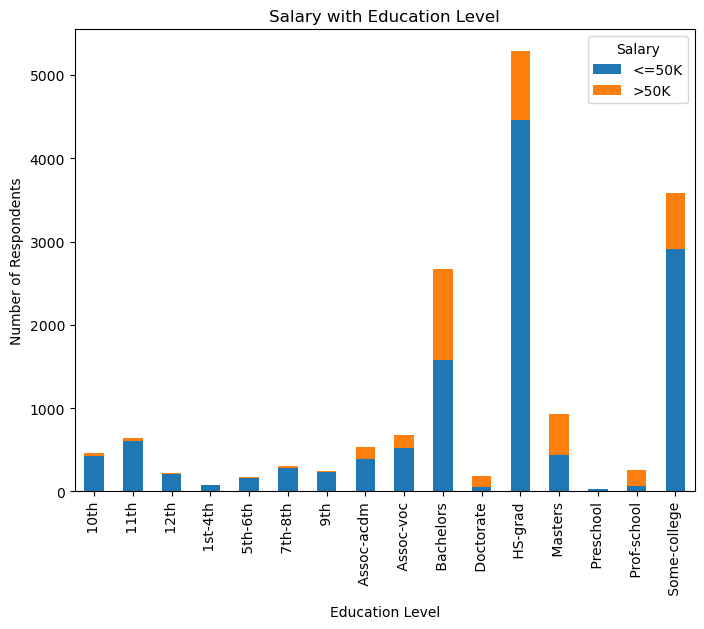

In [13]:
# Group by 'EDUCATION' and count the number of respondents in each salary category
grouped = df.groupby('EDUCATION')['SALARY_LABEL'].value_counts().unstack().fillna(0)

# Plotting the grouped data
grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.title('Salary with Education Level')
plt.xticks(rotation=90)
plt.legend(title='Salary', labels=['<=50K', '>50K'])
plt.savefig('../resources/img/salary_dist.svg', format='svg')
plt.show()